## Implementing Elastic Net(L2 regularization) using sklearn
We are now going to implement the same algorithm using sklearn

#### Importing Libraries

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

#### Importing Data

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/sahdevsaini/Data-Set/main/Salary_Data.csv")

In [10]:
df.shape

(30, 2)

In [11]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### Selecting Dependent Variable & Independent Varible 

In [13]:
X = df.iloc[:,:1]         # Independent Varible (Year Of Experiance)
y = df.iloc[:,-1]         # Dependent varible (Salary)

#### And now we split the data into training and testing. With shuffeling of course. And we reshape the training and testing X value.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#### Then we fit our linear regression model.

In [15]:
from sklearn.linear_model import LinearRegression
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(X_train,y_train)

LinearRegression()

We can then test our model with the predict function and see how well it did with the mean_squared_error function

In [16]:
from sklearn.metrics import mean_squared_error
predicted_y = simple_linear_regression.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,predicted_y))

print("Root Mean Squared Error value = {}".format(rmse))

Root Mean Squared Error value = 5140.765388013391


#### Slope of best fit Line

In [17]:
m= simple_linear_regression.coef_[0]
m

9347.36881240705

#### Intercept of best Fit line

In [18]:
b = simple_linear_regression.intercept_
b

26916.993520288946

#### Equation of best fit line

In [19]:
print("Y = ({} * X)+ {}".format(m,b))

Y = (9347.36881240705 * X)+ 26916.993520288946


In [20]:
def plot_linear_regression_result(x,y,predicted_y):
    # plotting the actual points as a scatter
    plt.figure(figsize=(8,4))
    plt.scatter(x,y,color = "g", marker = "o",s=30)
    
    # plotting the regression line
    plt.plot(x, predicted_y, color = "r", linewidth=2)
 
    # putting labels
    plt.title('Linear regression of Year of Experiance & Salary')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
 
    # function to show plot
    plt.show()

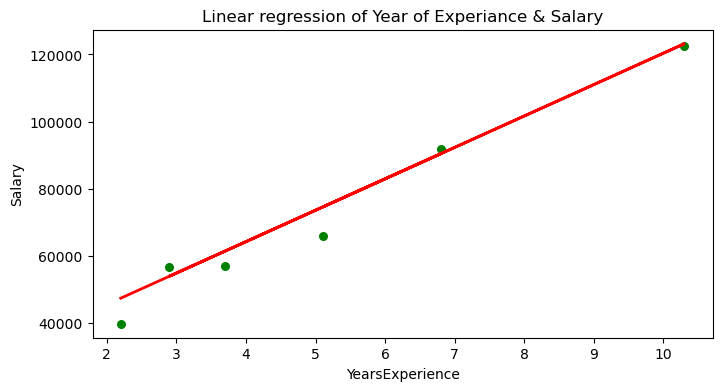

In [21]:
plot_linear_regression_result(X_test,y_test,predicted_y)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_y)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_y)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predicted_y, squared=False)

# Calculate R-squared (R2) Score
r2_linear = r2_score(y_test, predicted_y)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_linear)


Mean Absolute Error (MAE): 4190.5775440832795
Mean Squared Error (MSE): 26427468.77459647
Root Mean Squared Error (RMSE): 5140.765388013391
R-squared (R2) Score: 0.9643684752548293


#### Accuracy of model

In [26]:
print("Accuacy of model:-", r2_linear*100)

Accuacy of model:- 96.43684752548293


#### Predication model

In [27]:
def predication(X):
    Y = (26858.283390428558 * X)+ 9257.234097109678
    return Y

In [28]:
predication(2.2)

68345.45755605251

#### Comparsion of Predicated value & Actual value

In [29]:
pd.DataFrame({"Predicated Value" : predicted_y,
              "Actual Value" : y_test})

,Predicated Value,Actual Value
16,74588.574464,66029.0
20,90479.101445,91738.0
5,54024.363076,56642.0
9,61502.258126,57189.0
28,123194.892288,122391.0
4,47481.204908,39891.0


# ---------------  Elastic Net(L2 regularization) -------------------
```python
Elastic Net regression is a linear regression model that combines L1 (Lasso) and L2 (Ridge) regularization penalties to overcome the limitations of both methods
```
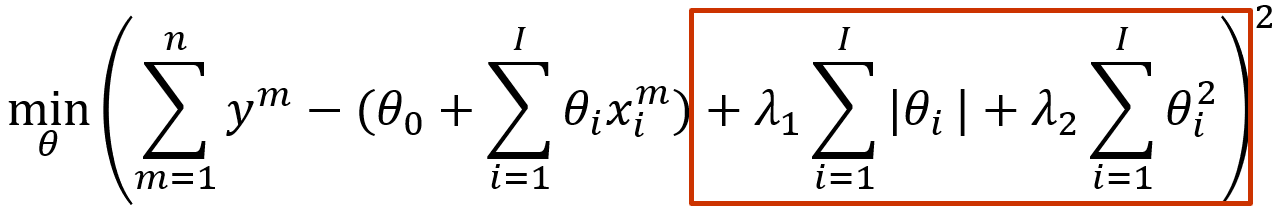

#### Importing model

In [45]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import ElasticNet          # Import ElasticNet regression model
from sklearn.model_selection import GridSearchCV     # Import GridSearchCV for hyperparameter tuning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#### # Create Elastic Net regressor

In [46]:
elastic_net = ElasticNet(max_iter=10000)           # Create an instance of the Ridge regression model

In [47]:
elastic_net

ElasticNet(max_iter=10000)

#### Define Hyperparameter Grid
#### Define a dictionary containing the values of the regularization parameter (alpha) to be tested

In [48]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}  # L1 ratio (mixing parameter) ranges from 0 to 1

#### Create a GridSearchCV object:
```python
   - ridge: The estimator (Ridge regression model)
   - parameters: The parameter grid to search over
   - scoring='neg_mean_squared_error': The scoring metric to optimize (negative mean squared error).
   - cv=5: Cross-validation strategy (5-fold cross-validation)
```

In [49]:
elastic_net_regressor = GridSearchCV(elastic_net, parameters, scoring='neg_mean_squared_error', cv=5)

#### Fit GridSearchCV
#### Fit the GridSearchCV object on the data (X features and y target)

In [50]:
elastic_net_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error')

#### Print the best parameters found by GridSearchCV
#### Print the best mean squared error score achieved by the Ridge regression model with the best parameters

In [51]:
print(elastic_net_regressor.best_params_)
print(elastic_net_regressor.best_score_)

{'alpha': 1, 'l1_ratio': 0.7}
-40431995.06435799


#### Instantiate Ridge model with best parameters

In [53]:
best_alpha = elastic_net_regressor.best_params_['alpha']
elastic_net_model = ElasticNet(alpha=best_alpha)

#### Fit the model on the training data

In [54]:
elastic_net_model.fit(X_train, y_train)

ElasticNet(alpha=1)

#### Predict on the test data

In [55]:
y_pred_elastic_net = elastic_net_model.predict(X_test)

#### Slope of ridge_model best fit line

In [56]:
m= elastic_net_model.coef_[0]
m

8787.250848811664

#### Intercept of ridge_model best fit line 

In [57]:
b = elastic_net_model.intercept_
b

29913.624625524266

#### best fit line of ridge_model 

In [58]:
print("Y = ({} * X)+ {}".format(m,b))

Y = (8787.250848811664 * X)+ 29913.624625524266


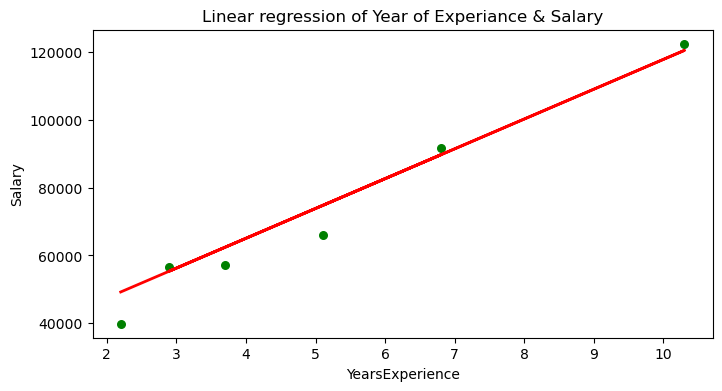

In [59]:
plot_linear_regression_result(X_test,y_test,y_pred_elastic_net)

In [60]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_elastic_net)
print("Mean Squared Error (MSE) for Ridge:", mse_ridge)

Mean Squared Error (MSE) for Ridge: 33389681.544546526


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_elastic_net)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_elastic_net)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_elastic_net, squared=False)

# Calculate R-squared (R2) Score
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_elastic_net)


Mean Absolute Error (MAE): 4762.79039344917
Mean Squared Error (MSE): 33389681.544546526
Root Mean Squared Error (RMSE): 5778.3805295728425
R-squared (R2) Score: 0.9549814901179068


In [65]:
print("Accuacy of model:-", r2_elastic_net*100)

Accuacy of model:- 95.49814901179067


In [67]:
pd.DataFrame({"Actual Value" : y_test,
              "Predicated Value" : predicted_y,
              "Ridge model predicted" : y_pred_elastic_net
             })

,Actual Value,Predicated Value,Ridge model predicted
16,66029.0,74588.574464,74728.603954
20,91738.0,90479.101445,89666.930397
5,56642.0,54024.363076,55396.652087
9,57189.0,61502.258126,62426.452766
28,122391.0,123194.892288,120422.308368
4,39891.0,47481.204908,49245.576493


#### Comaprsion of Actual value Predicated_y, Lasso model prediucted

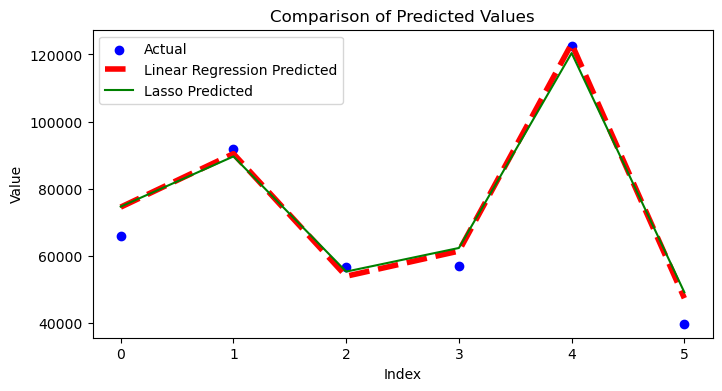

In [68]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(8, 4))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot linear regression predicted values (dotted line with thicker width)
plt.plot(range(len(predicted_y)), predicted_y, color='red', linestyle='--', linewidth=4, label='Linear Regression Predicted')

# Plot Lasso regression predicted values
plt.plot(range(len(y_pred_elastic_net)), y_pred_elastic_net, color='green', label='Lasso Predicted')

plt.title('Comparison of Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [41]:
def predict(X):
    Y = (8960.588372619652 * X)+ 28207.46004561679
    return round(Y,2)

In [132]:
experience = 3
print(f"Salary with {experience} Experience: {predict(experience)}")


Salary with 3 Experience: 55089.23


#### Improvement after Using Ridge Regression

In [70]:
improve  = r2_elastic_net - r2_linear
print("After Apply Elastic Net Regession improvement in model:- ",improve*100,"%")

After Apply Elastic Net Regession improvement in model:-  -0.9386985136922488 %
